<a href="https://colab.research.google.com/github/Ash100/MDS/blob/main/E_landscap_SSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Energy Landscape (simple projection using RMSD vs RoG)
Generated by Dr. Ashfaq Ahmad

In [1]:
# Mount Google Drive to access your files
# This will prompt you to authorize Colab to access your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Optional
!pip install notebook==6.5.7 jupyter-client==7.4.9


In [ ]:
!pip install MDAnalysis nglview matplotlib

In [6]:
# --- Cell 2: Define File Paths and Load Trajectory ---
import MDAnalysis as mda

# Replace with your actual file paths
pdb_path = "/content/drive/MyDrive/Zia_Zohaib/6slg/prot_lig_equil.pdb"  # Replace with your PDB file path
dcd_path = "/content/drive/MyDrive/Zia_Zohaib/6slg/prot_lig_prod1-10_whole.dcd"  # Replace with your DCD file path

u = mda.Universe(pdb_path, dcd_path)


/usr/local/lib/python3.11/dist-packages/MDAnalysis/topology/PDBParser.py:295: UserWarning: PDB file is missing resid information.  Defaulted to '1'
  warnings.warn("PDB file is missing resid information.  "
/usr/local/lib/python3.11/dist-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


/usr/local/lib/python3.11/dist-packages/MDAnalysis/analysis/rms.py:824: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


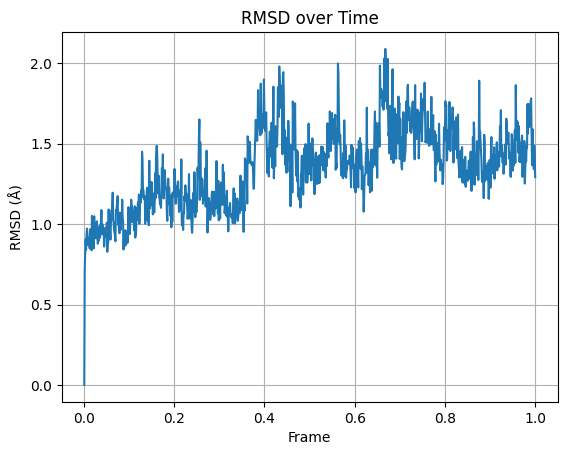

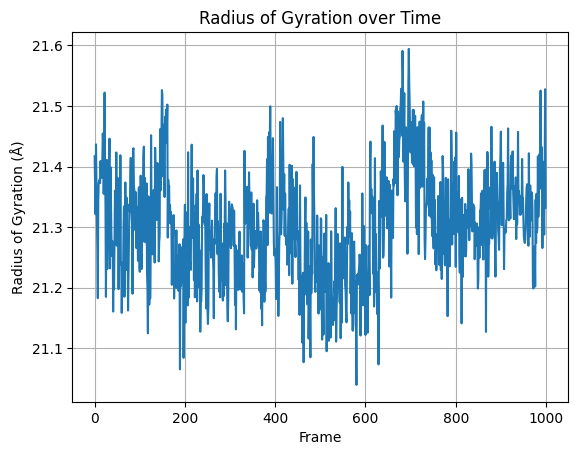

In [7]:
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rms

# RMSD Calculation
R = rms.RMSD(u, u, select="protein and name CA")
R.run()

plt.plot(R.rmsd[:,1], R.rmsd[:,2])
plt.xlabel('Frame')
plt.ylabel('RMSD (Å)')
plt.title('RMSD over Time')
plt.grid(True)
plt.show()

# Radius of Gyration Calculation
rog = []
protein = u.select_atoms("protein")

for ts in u.trajectory:
    rog.append(protein.radius_of_gyration())

plt.plot(rog)
plt.xlabel("Frame")
plt.ylabel("Radius of Gyration (Å)")
plt.title("Radius of Gyration over Time")
plt.grid(True)
plt.show()


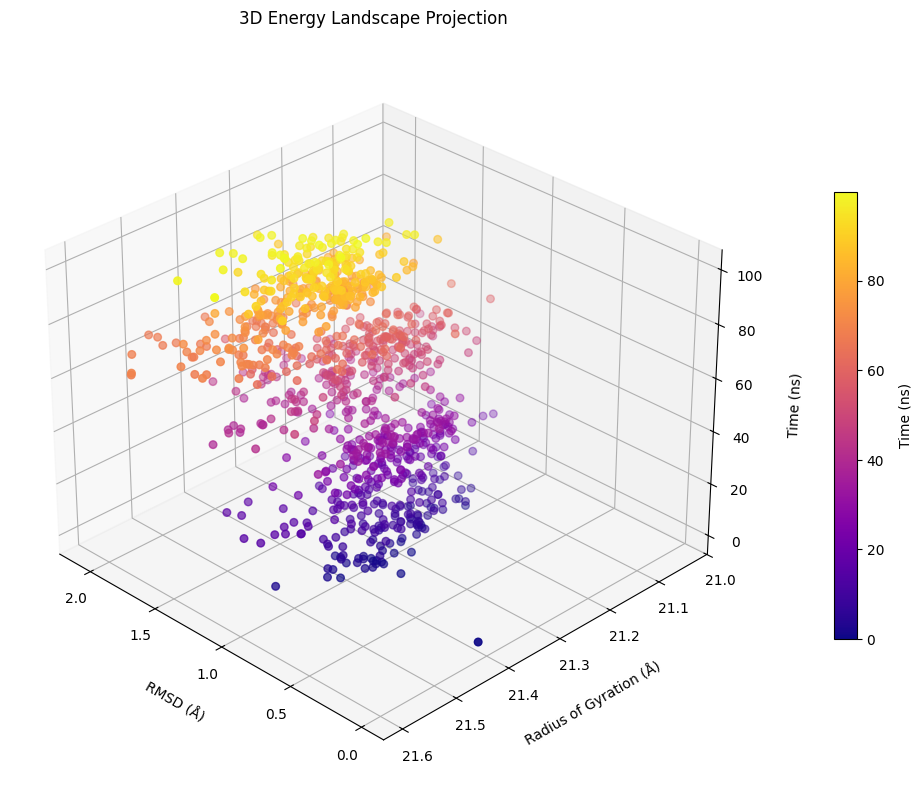

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Frame numbers and Time (ns)
frames = np.arange(len(R.rmsd[:, 2]))
time_ns = frames * 0.1  # Convert to nanoseconds

# Convert to NumPy arrays
RMSD_vals = np.array(R.rmsd[:, 2])
RoG_vals = np.array(rog)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapped to time
scatter = ax.scatter(RMSD_vals, RoG_vals, time_ns, c=time_ns, cmap='plasma', s=30)

# Set axis labels with padding
ax.set_xlabel("RMSD (Å)", labelpad=12)
ax.set_ylabel("Radius of Gyration (Å)", labelpad=12)
ax.set_zlabel("Time (ns)", labelpad=12)

# Add colorbar
cb = fig.colorbar(scatter, ax=ax, shrink=0.6, pad=0.1)
cb.set_label('Time (ns)', labelpad=10)

# Adjust view for better label visibility
ax.view_init(elev=30, azim=135)

# Title
ax.set_title("3D Energy Landscape Projection", pad=20)

# Save and show
plt.tight_layout()
plt.show()
fig.savefig("6slg_energy_landscape_3d_fixed.png", dpi=600)

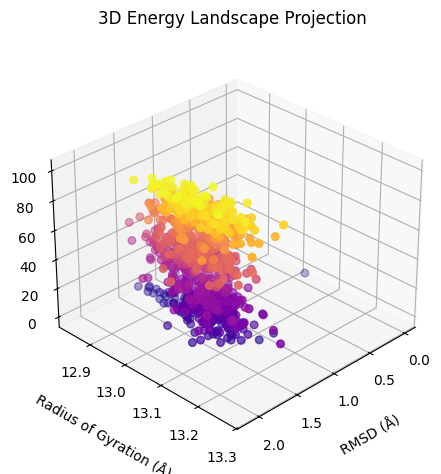

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Frame numbers and time
frames = np.arange(len(R.rmsd[:,2]))
time_ns = frames * 0.1  # Convert to nanoseconds

# RMSD values
RMSD_vals = R.rmsd[:,2]

# Radius of Gyration values
RoG_vals = rog

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot
ax.scatter(RMSD_vals, RoG_vals, time_ns, c=time_ns, cmap='plasma', s=30)

# Labels
ax.set_xlabel("RMSD (Å)", labelpad=12)
ax.set_ylabel("Radius of Gyration (Å)", labelpad=12)
ax.set_zlabel("Time (ns)", labelpad=16)  # Adjust as needed

# Rotate for better visibility
ax.view_init(elev=30, azim=45)

# Title
ax.set_title("3D Energy Landscape Projection", pad=20)

# Manual margin adjustments instead of tight_layout
plt.subplots_adjust(left=0.5, right=0.9, bottom=0.1, top=0.9)

# Show and save
plt.show()
fig.savefig("3wa4_energy_landscape_3d.png", dpi=600)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Prepare data
frames = np.arange(len(R.rmsd[:, 2]))           # Frame index
RMSD_vals = R.rmsd[:, 2]                        # RMSD values
RoG_vals = rog                                  # Radius of Gyration

# Create figure
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# === Scatter Plot ===
sc = ax.scatter(RMSD_vals, RoG_vals, frames, c=frames, cmap='plasma', s=30, label='Trajectory Points')

# === Surface Interpolation ===
# Define grid
xi = np.linspace(min(RMSD_vals), max(RMSD_vals), 100)
yi = np.linspace(min(RoG_vals), max(RoG_vals), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate frame indices onto grid
zi = griddata((RMSD_vals, RoG_vals), frames, (xi, yi), method='linear')

# Clean up interpolation artifacts
zi = np.where(np.isnan(zi), 0, zi)              # Replace NaNs with 0
zi = np.clip(zi, 0, len(frames)-1)              # Clamp negative values

# Plot interpolated surface
surf = ax.plot_surface(xi, yi, zi, cmap="viridis", edgecolor='none', alpha=0.75)

# === Axis Settings ===
ax.set_xlabel("RMSD (Å)", labelpad=10)
ax.set_ylabel("Radius of Gyration (Å)", labelpad=10)
ax.set_zlabel("Frame Index", labelpad=10)
ax.set_title("3D Energy Landscape Projection", pad=20)
ax.view_init(elev=20, azim=135)

# === Color Bar and Legend ===
fig.colorbar(sc, ax=ax, shrink=0.5, label="Frame Index")

# === Save Plot ===
plt.tight_layout()
fig.savefig("3wa4_energy_landscape_sheet_clean.png", dpi=600)
plt.show()


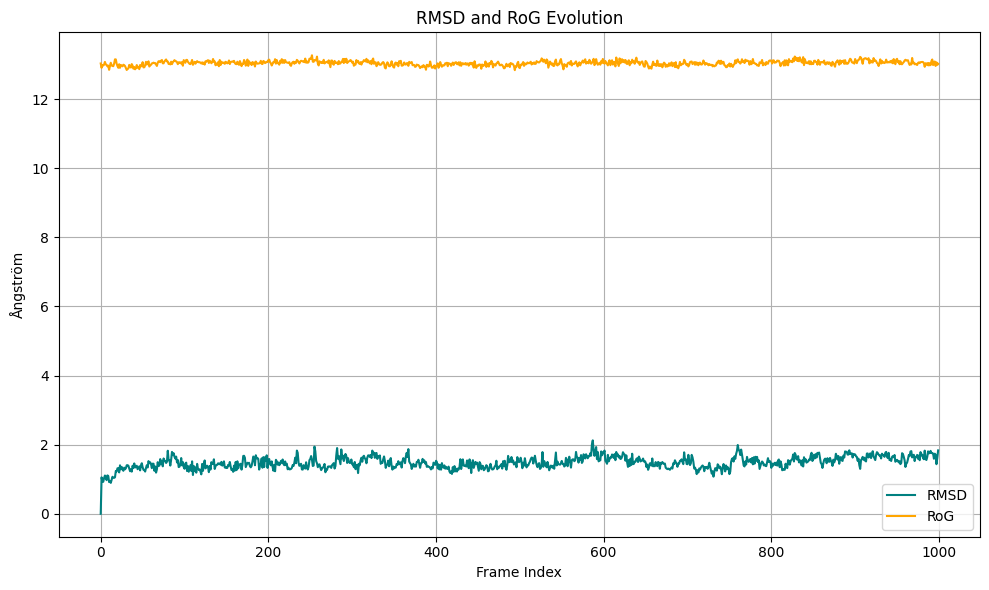

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(frames, RMSD_vals, label='RMSD', color='teal')
plt.plot(frames, RoG_vals, label='RoG', color='orange')
plt.xlabel("Frame Index")
plt.ylabel("Ångström")
plt.title("RMSD and RoG Evolution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("rmsd_rog_line_plot.png", dpi=600)
plt.show()


In [ ]:
!pip install -U MDAnalysis[analysis,visualization]


In [3]:
!apt-get update
!apt-get install dssp


Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [5]:
import MDAnalysis as mda
from MDAnalysis.analysis.secondary_structure import DSSP

# Load universe
u = mda.Universe("/content/drive/MyDrive/Zia_Zohaib/3wa4/prot_lig_equil.pdb", "/content/drive/MyDrive/Zia_Zohaib/3wa4/prot_lig_prod1-10_whole.dcd")  # change to your filenames

# Run DSSP
dssp = DSSP(u, dssp='mkdssp')  # explicitly call the mkdssp executable
dssp.run()

# Save results
ss_array = dssp.results['dssp']
print("DSSP shape:", ss_array.shape)  # should be (frames, residues)


ModuleNotFoundError: No module named 'MDAnalysis.analysis.secondary_structure'

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === Prepare DSSP matrix ===
ss_array = dssp.results['dssp']  # Shape: [frames × residues]

# Map DSSP codes to numeric structure types
code_map = {'H': 1, 'G': 1, 'I': 1,    # α-, 3_10-, π-helices
            'E': 2, 'B': 2,            # β-strands/sheets
            'T': 0, 'S': 0, 'C': 0, '-': 0}  # Coil / turns / undefined

ss_numeric = np.array([[code_map.get(code, -1) for code in row] for row in ss_array])

# === Configure plot aesthetics ===
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))

# Heatmap with custom colormap
cmap = sns.color_palette(["#aaaaaa", "#1f77b4", "#d62728"])  # coil=gray, helix=blue, sheet=red
sns.heatmap(ss_numeric.T, cmap=cmap, cbar_kws={"label": "Structure Type"}, xticklabels=50, yticklabels=10)

# Axis labels and titles
plt.xlabel("Frame Index", fontsize=14)
plt.ylabel("Residue Index", fontsize=14)
plt.title("🧬 Secondary Structure Dynamics Over Time", fontsize=16, pad=15)

# Optional: mark domains or motifs
# domain_ranges = [(5, 20), (40, 60)]  # example: helix1 and sheet2
# for start, end in domain_ranges:
#     plt.axhspan(start, end, color='yellow', alpha=0.3)

plt.tight_layout()
plt.savefig("secondary_structure_annotated_heatmap.png", dpi=400)
plt.show()


NameError: name 'dssp' is not defined

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# DSSP output: ss_array shape → frames × residues
ss_array = dssp.results['dssp']

# Map DSSP codes to structure types
code_map = {'H': 1, 'G': 1, 'I': 1,     # Helices
            'E': 2, 'B': 2,             # Sheets
            'T': 0, 'S': 0, 'C': 0, '-': 0}  # Coils and undefined

ss_numeric = np.array([[code_map.get(code, -1) for code in row] for row in ss_array])

# Transpose: residues (y-axis), time (x-axis)
ss_numeric_T = ss_numeric.T

# Custom color map: coil=gray, helix=blue, sheet=red
cmap = sns.color_palette(["#aaaaaa", "#1f77b4", "#d62728"])

# Configure time labels in ns
frame_count = ss_numeric.shape[0]
ns_labels = [int(i*0.1) for i in range(frame_count)]   # Convert frames to ns
xticks = np.linspace(0, frame_count-1, 11, dtype=int)  # 0, 100, 200, ..., 1000 frames
xticklabels = [str(ns_labels[i]) for i in xticks]      # 0, 10, 20, ..., 100 ns

# Plot
sns.set(style="white")
plt.figure(figsize=(16, 8))
ax = sns.heatmap(ss_numeric_T, cmap=cmap, cbar=False)

# Axis labels
plt.xlabel("Time (ns)", fontsize=14)
plt.ylabel("Residue Index", fontsize=14)
plt.title("🧬 Secondary Structure Evolution Over Time", fontsize=16, pad=15)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontsize=12)

# Create custom legend
legend_elements = [
    Patch(facecolor="#aaaaaa", edgecolor='k', label="Coil"),
    Patch(facecolor="#1f77b4", edgecolor='k', label="Helix"),
    Patch(facecolor="#d62728", edgecolor='k', label="Sheet")
]
plt.legend(handles=legend_elements, title="Structure Type", bbox_to_anchor=(1.03, 1), loc="upper left", fontsize=12, title_fontsize=13)

plt.tight_layout()
plt.savefig("secondary_structure_timeline_ns_labeled.png", dpi=400)
plt.show()


NameError: name 'dssp' is not defined